# Menpo (profile) Results

This jupyter notebook summarises the results of the active appearance models which were trained using the *menpo* Python Package.  For more information regarding the training of these models please refer to:

1. Section 4 of the Review Paper
2. The Active Appearance Model base class contained within *aam.py*
3. The Menpo specific subclass of the base *menpoAAM.py*
4. The holisitc AAM and patch AAM models described within *menpo_aam_profile_hol.py* and *menpo_aam_profile_patch.py*

This notebook will contained the cumulative error distribution curves produced by the models as well as a selection from literature.

-------------------------------------------------------------------------------------------------------------------------

## Resource Utilisation

| Model | Time (hh:mm:ss)   |  Avg # CPUs Used |  Memory Used (GB) |
|-------|-------------------|------------------|-------------------|
|  hAAM |     00:28:56      |       4.76       |        5.4        |
|  pAAM |     00:36:44      |       6.09       |        5.4        |
-------------------------------------------------------------------------------------------------------------------------
## Test Set

A brief description of the test set used during the experiment.  Note that the same test set was used for both holistic and patch experiments.

In [1]:
import os
with open('menpo_aam_profile_hol_testset.txt', 'r') as f:
    test_set_filenames = f.read().split('\n')

print("The test set comprised of %i images\n" % len(test_set_filenames))
print("Listing the first 10 images:")

# Print summary
test_set_filenames = [os.path.basename(filename) for filename in test_set_filenames]
print("\t".join(test_set_filenames[:10]) + "...")

The test set comprised of 690 images

Listing the first 10 images:
aflw__face_43527.jpg	aflw__face_47700.jpg	aflw__face_41359.jpg	aflw__face_46016.jpg	aflw__face_41722.jpg	aflw__face_42627.jpg	aflw__face_44132.jpg	aflw__face_47664.jpg	aflw__face_40758.jpg	aflw__face_49788.jpg...


## Cumulative Error Distribution Curves

The following chart shows the normalised error distribution as produced by the holisitic and patch AAMs vs that described by Chen et al. in 2017<sup>1</sup>, He et al. in 2017<sup>2</sup> and Zadeh et al. in 2017<sup>3</sup>

1. Chen, X., Zhou, E., Mo, Y., Liu, J., & Cao, Z. (2017). Delving Deep Into Coarse-To-Fine Framework for Facial Landmark Localization. In The IEEE Conference on Computer Vision and Pattern Recognition (CVPR) Workshops.
2. He, Z., Kan, M., Zhang, J., Chen, X., & Shan, S. (2017). A Fully End-to-End Cascaded CNN for Facial Landmark Detection. In 2017 12th IEEE International Conference on Automatic Face & Gesture Recognition (FG 2017) (pp. 200–207). IEEE. http://doi.org/10.1109/FG.2017.33
3. Zadeh, A., Baltrusaitis, T., & Morency, L.-P. (2017). Convolutional Experts Constrained Local Model for Facial Landmark Detection. In The IEEE Conference on Computer Vision and Pattern Recognition (CVPR) Workshops.

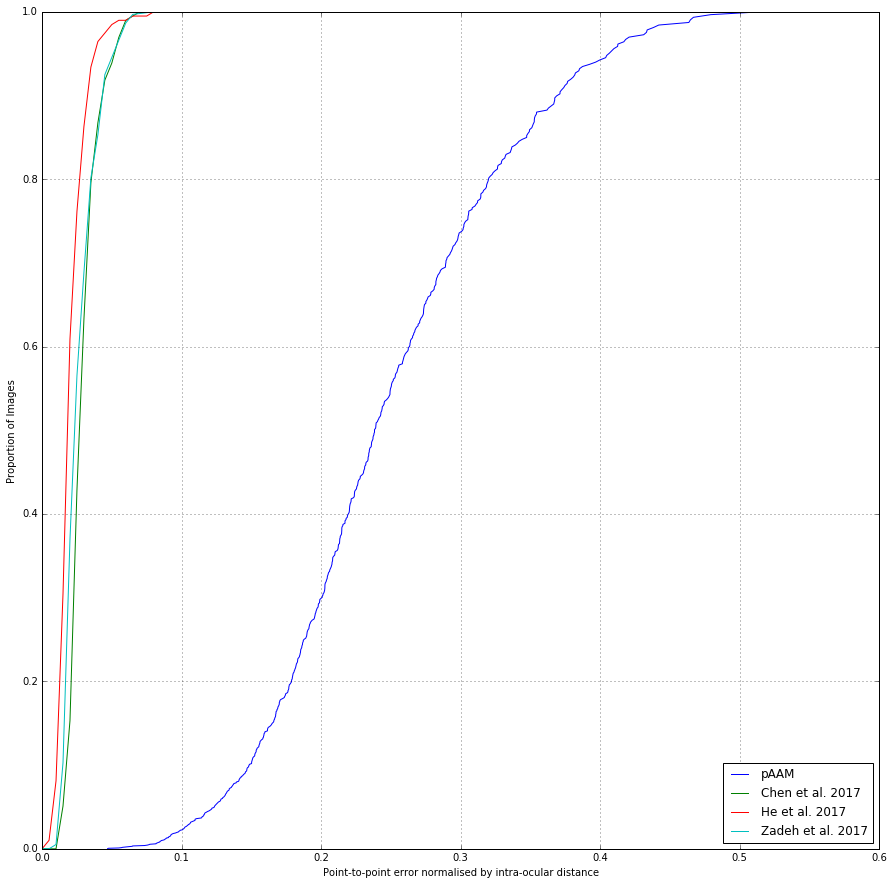

In [4]:
import numpy as np

# Import and configure matplotlib
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 15)
import matplotlib.pyplot as plt


# These files contains the CED data from experimentation & literature
FILES = [ 'menpo_aam_profile_patch.npy', 'menpo_profile_chen_2017.npy',
         'menpo_profile_he_2017.npy', 'menpo_profile_zadeh_2017.npy']
LABELS = ['pAAM', 'Chen et al. 2017', 'He et al. 2017',
          'Zadeh et al. 2017']

for filename, label in zip(FILES, LABELS):
    
    # Load the data
    data = np.load(filename)
    
    # Normalise
    data[1] /= np.max(data[1])
    
    # Plot
    plt.plot(data[0], data[1], label=label)


# Add details to plot
plt.legend(loc='lower right');
plt.grid();
plt.xlabel('Point-to-point error normalised by intra-ocular distance');
plt.ylabel('Proportion of Images');